### VCR 원본 데이터 예시

In [ ]:
## VCR 원본 데이터 구성(train.jsonl)(val.jsonl도 형태는 동일) 
## /home/public/yunvqa/vcr/dataset/test.jsonl


{'annot_id': 'train-100',
 'answer_choices': [['He', 'is', 'feeling', 'scared', '.'],
                    ['He',
                     'feels',
                     'unsure',
                     'concerning',
                     'what',
                     'he',
                     'is',
                     'about',
                     'to',
                     'do',
                     '.'],
                    ['He', 'is', 'feeling', 'despair', '.'],
                    ['He', 'is', 'feeling', 'anticipation', '.']],
 'answer_label': 1,
 'answer_likelihood': 'possible',
 'answer_match_iter': [3, 0, 2, 1],
 'answer_orig': 'He feels unsure concerning what he is about to do.',
 'answer_sources': [11804, 100, 6753, 22597],
 'img_fn': 'lsmdc_3038_ITS_COMPLICATED/3038_ITS_COMPLICATED_00.25.12.945-00.25.14.137@0.jpg',
 'img_id': 'train-34',
 'interesting_scores': [0],
 'match_fold': 'train-0',
 'match_index': 100,
 'metadata_fn': 'lsmdc_3038_ITS_COMPLICATED/3038_ITS_COMPLICATED_00.25.12.945-00.25.14.137@0.json',
 'movie': '3038_ITS_COMPLICATED',
 'objects': ['person', 'person', 'person', 'person', 'tie', 'cup', 'chair'],
 'question': ['What', 'is', [0], 'feeling', '?'],
 'question_number': 2,
 'question_orig': 'What is 1 feeling.',
 'rationale_choices': [['He',
                        'has',
                        'a',
                        'look',
                        'of',
                        'worry',
                        'and',
                        'sadness',
                        'on',
                        'his',
                        'face',
                        '.'],
                       ['He',
                        'appears',
                        'emotionless',
                        'and',
                        'quite',
                        'focused',
                        'on',
                        'the',
                        'task',
                        'at',
                        'hand',
                        '.'],
                       ['He',
                        'has',
                        'a',
                        'questioning',
                        'look',
                        'on',
                        'his',
                        'face',
                        'and',
                        [0],
                        'appears',
                        'to',
                        'be',
                        'sneaking',
                        'up',
                        'behind',
                        'him',
                        '.'],
                       ['He',
                        'does',
                        'not',
                        'think',
                        'he',
                        'will',
                        'be',
                        'able',
                        'to',
                        'defend',
                        'himself',
                        '.']],
 'rationale_label': 0,
 'rationale_match_iter': [0, 2, 3, 1],
 'rationale_orig': 'He has a look of worry and sadness on his face.',
 'rationale_sources': [100, 10201, 4304, 15902]}


In [ ]:
##test 데이터 예시 

{'annot_id': 'test-10',
 'answer_choices': [['No', 'it', 'is', 'an', 'illegal', 'weapon', '.'],
                    ['No', [0, 1], 'could', 'not', '.'],
                    ['No',
                     ',',
                     'they',
                     'are',
                     'only',
                     'going',
                     'to',
                     'use',
                     'their',
                     'hands',
                     '.'],
                    ['Yes',
                     ',',
                     'there',
                     'is',
                     'enough',
                     'of',
                     'them',
                     'that',
                     'they',
                     'have',
                     'to',
                     'be',
                     'very',
                     'careful',
                     '.']],
 'img_fn': 'lsmdc_1026_Legion/1026_Legion_01.32.16.651-01.32.24.117@0.jpg',
 'img_id': 'test-3',
 'match_fold': 'test-0',
 'match_index': 10,
 'metadata_fn': 'lsmdc_1026_Legion/1026_Legion_01.32.16.651-01.32.24.117@0.json',
 'movie': '1026_Legion',
 'objects': ['person', 'person', 'couch'],
 'question': ['Could', 'the', 'weapons', 'be', 'used', 'against', [0, 1], '?'],
 'question_number': 2,
 'rationale_choices': [['They',
                        'are',
                        'in',
                        'the',
                        'desert',
                        'and',
                        'there',
                        'is',
                        'likely',
                        'not',
                        'much',
                        'cover',
                        '.'],
                       ['If',
                        'not',
                        'used',
                        'to',
                        'shooing',
                        'a',
                        'bit',
                        'handgun',
                        ',',
                        'the',
                        'recoil',
                        'will',
                        'make',
                        'the',
                        'aim',
                        'inaccurate',
                        ',',
                        'add',
                        'to',
                        'that',
                        'the',
                        'anxiety',
                        'of',
                        'being',
                        'robbed',
                        'and',
                        'at',
                        'a',
                        'distance',
                        'it',
                        'is',
                        'more',
                        'chance',
                        'of',
                        'getting',
                        'in',
                        'a',
                        'hit',
                        'than',
                        'skill',
                        '.'],
                       ['The',
                        'tree',
                        'has',
                        'many',
                        'thinner',
                        'branches',
                        ',',
                        [0, 1],
                        'will',
                        'bend',
                        'them',
                        'or',
                        'break',
                        'them',
                        '.'],
                       ['The',
                        'alien',
                        'is',
                        'from',
                        'another',
                        'planet',
                        'so',
                        'it',
                        'is',
                        'unknown',
                        'how',
                        'deadly',
                        'they',
                        'are',
                        '.']]}


## dataload

### 패키지 import 및 전역변수 설정

In [3]:
import json
from PIL import Image
#이미지 경로 설정 
img_path = "/home/public/yunvqa/vcr/dataset/vcr1images/"

### 문자열 처리 함수 정의

In [4]:
#VCR 데이터셋의 질문(리스트 형태) 형식 변환 함수 
#일단 문장 마지막에 줄바꿈문자(\n)는 추가하지 않았습니다! 
def QE_list2_str(q_list, obj_list):
    result = ""
    for q in q_list:
        if isinstance(q, list) :
            for num in q:
                result += obj_list[num]+' '
        else:
            result += q+' '
    #result += "\n"
    
    return result

In [5]:
#QE_list2 함수 동작 확인 

test_list = ['Does', [2], 'feel', 'comfortable', '?']

print(QE_list2_str(test_list, ['person', 'person', 'person', 'car']))

Does person feel comfortable ? 


### train 데이터 로드

데이터 중 질문, 설명에 'Could the weapons be used against person person ?'와 같이 같은 표현이 다른 객체를 지칭하는 경우가 있습니다.
vcr 데이터셋의 경우 사진에 객체별로 박스를 그려서 학습 과정에서 객체를 분류하도록 하는 것 같습니다.
다만 blip2 test 코드에서는 박스 처리를 따로 진행하는 것 같지 않아서 일단 객체 지칭 처리는 저 상태로 두었습니다...! 

In [6]:

#train 데이터 로딩
train_json_data = {}

#파일 오픈 
with open('/home/public/yunvqa/vcr/dataset/train.jsonl', 'r') as f:
    for line in f:
        temp_dict = {}
        temp_line = json.loads(line) #파일 한 줄씩 읽어오기
        
        #정답, 설명 가중치 설정. 
        #vcr 데이터에는 가중치 항목이 없어서 blip2 테스트 코드 참조하여 정답은 1, 나머지는 0.3으로 임의로 설정했습니다!
        answer_weight = [0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896]
        answer_weight[temp_line['answer_label']] = 1
        
        rationale_weigths = [0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896]
        rationale_weigths[temp_line['rationale_label']] = 1
        
        #정답 리스트 제작
        answer_list =[]
        for answer_raw in temp_line['answer_choices'] :
            answer_list.append(QE_list2_str(answer_raw, temp_line['objects']))
        
        #설명 리스트 제작
        explanation_list = []
        for explanation_raw in temp_line['rationale_choices'] :
            explanation_list.append(QE_list2_str(explanation_raw, temp_line['objects']))
        
        #최종 딕셔너리 정의
        temp_dict['question'] = QE_list2_str(temp_line['question'], temp_line['objects'])
        temp_dict['image_id'] = img_path+temp_line['img_fn']
        temp_dict['label'] = {'ids' : answer_list, 'weights': answer_weight }
        temp_dict['explanation'] = {'ids' : explanation_list, 'weights' : rationale_weigths}
        
        #append 
        train_json_data.append(temp_dict)
        
#데이터 확인         
print(train_json_data[0])
image = Image.open(train_json_data[0]['image_id'])
image

AttributeError: 'dict' object has no attribute 'append'

### test 데이터 로드 (train, val이랑 과정이 diff)

{'question': 'Could the weapons be used against person person ? ', 'image_id': '/home/public/yunvqa/vcr/dataset/vcr1images/lsmdc_1026_Legion/1026_Legion_01.32.16.651-01.32.24.117@0.jpg', 'label': {'ids': ['No it is an illegal weapon . ', 'No person person could not . ', 'No , they are only going to use their hands . ', 'Yes , there is enough of them that they have to be very careful . ']}, 'explanation': {'ids': ['They are in the desert and there is likely not much cover . ', 'If not used to shooing a bit handgun , the recoil will make the aim inaccurate , add to that the anxiety of being robbed and at a distance it is more chance of getting in a hit than skill . ', 'The tree has many thinner branches , person person will bend them or break them . ', 'The alien is from another planet so it is unknown how deadly they are . ']}}


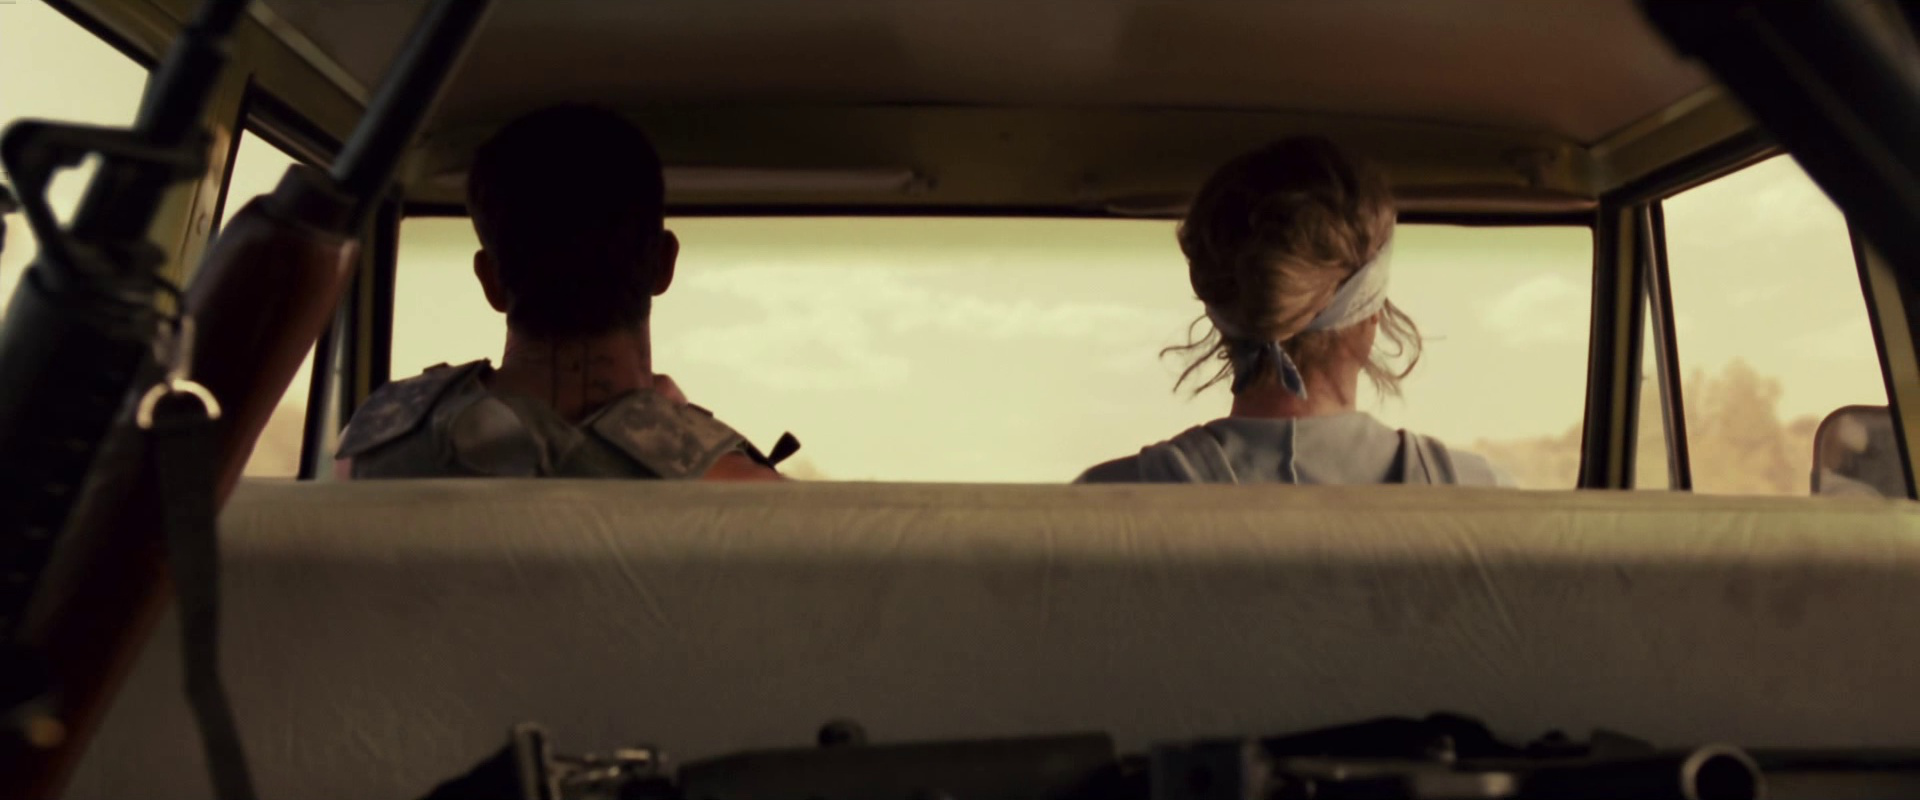

In [7]:
#test 데이터 로딩

test_json_data = []
with open('/home/public/yunvqa/vcr/dataset/test.jsonl', 'r') as f:
    for line in f:
        temp_dict = {}
        temp_line = json.loads(line)
        
        answer_list =[]
        for answer_raw in temp_line['answer_choices'] :
            answer_list.append(QE_list2_str(answer_raw, temp_line['objects']))
        
        explanation_list = []
        for explanation_raw in temp_line['rationale_choices'] :
            explanation_list.append(QE_list2_str(explanation_raw, temp_line['objects']))
            
        temp_dict['question'] = QE_list2_str(temp_line['question'], temp_line['objects'])
        temp_dict['image_id'] = img_path+temp_line['img_fn']
        temp_dict['label'] = {'ids' : answer_list}
        temp_dict['explanation'] = {'ids' : explanation_list}
        
        test_json_data.append(temp_dict)
        
#데이터 확인         
print(test_json_data[10])
image = Image.open(test_json_data[10]['image_id'])
image


### val 데이터 로드

{'question': 'Why is person looking at person ? ', 'image_id': '/home/public/yunvqa/vcr/dataset/vcr1images/lsmdc_0010_Frau_Ohne_Gewissen/0010_Frau_Ohne_Gewissen_01.06.37.704-01.06.40.653@0.jpg', 'label': {'ids': ["person is doing something person doesn ' t like . ", 'person finds person attractive . ', 'person is worried about person . ', 'person wants to talk to person . '], 'weights': [0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 1]}, 'explanation': {'ids': ['person person are facing towards person . ', 'People approach the person they want to talk to . ', 'person person had an argument . ', 'person is near person person is who actively working on art and would be a good person to ask about that . '], 'weights': [0.30000001192092896, 0.30000001192092896, 1, 0.30000001192092896]}}


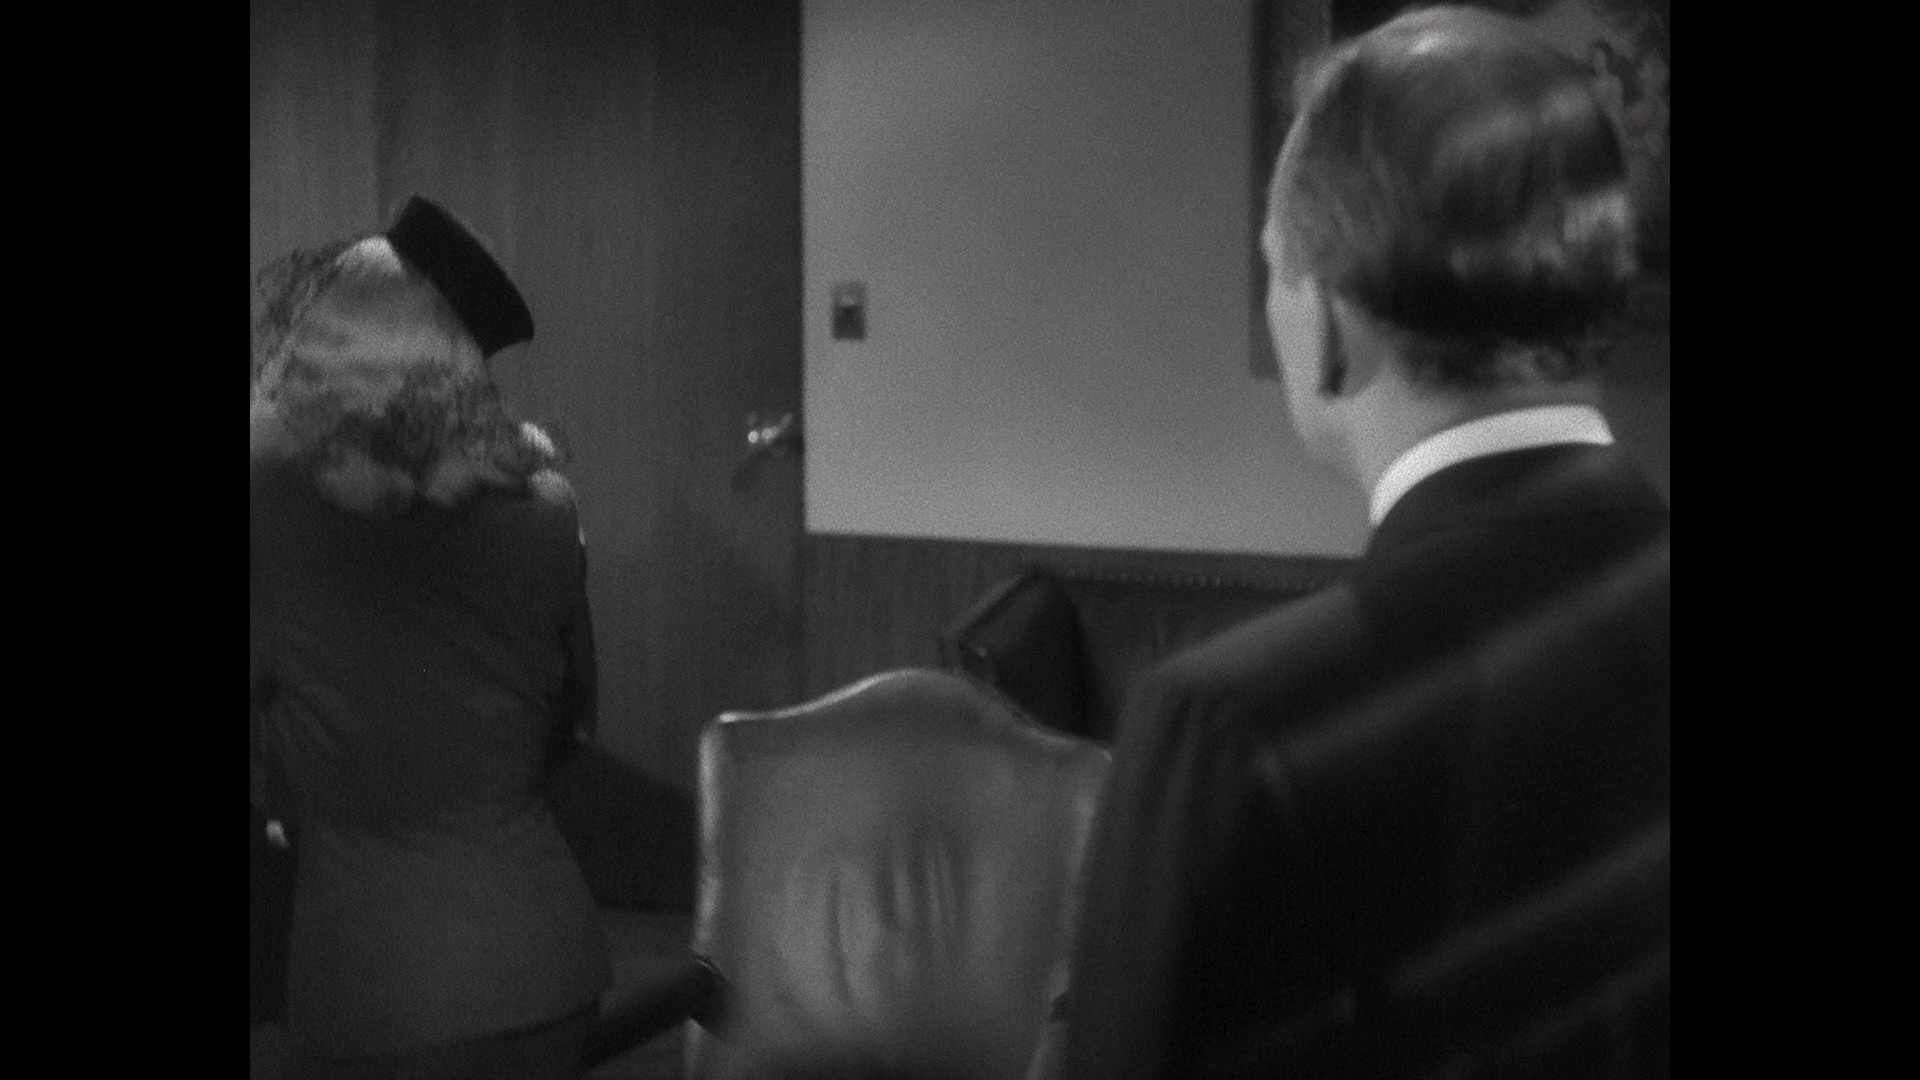

In [9]:
#val 데이터 로딩

val_json_data = []
with open('/home/public/yunvqa/vcr/dataset/val.jsonl', 'r') as f:
    for line in f:
        temp_dict = {}
        temp_line = json.loads(line)
        answer_weight = [0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896]
        answer_weight[temp_line['answer_label']] = 1
        
        rationale_weigths = [0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896]
        rationale_weigths[temp_line['rationale_label']] = 1
        
        answer_list =[]
        for answer_raw in temp_line['answer_choices'] :
            answer_list.append(QE_list2_str(answer_raw, temp_line['objects']))
        
        explanation_list = []
        for explanation_raw in temp_line['rationale_choices'] :
            explanation_list.append(QE_list2_str(explanation_raw, temp_line['objects']))
            
        temp_dict['question'] = QE_list2_str(temp_line['question'], temp_line['objects'])
        temp_dict['image_id'] = img_path+temp_line['img_fn']
        temp_dict['label'] = {'ids' : answer_list, 'weights': answer_weight }
        temp_dict['explanation'] = {'ids' : explanation_list, 'weights' : rationale_weigths}
        
        val_json_data.append(temp_dict)
        
#데이터 확인         
print(val_json_data[10])
image = Image.open(val_json_data[10]['image_id'])
image

### bone pile

In [14]:
import pprint

pprint.pprint(json_data[100])

{'annot_id': 'train-100',
 'answer_choices': [['He', 'is', 'feeling', 'scared', '.'],
                    ['He',
                     'feels',
                     'unsure',
                     'concerning',
                     'what',
                     'he',
                     'is',
                     'about',
                     'to',
                     'do',
                     '.'],
                    ['He', 'is', 'feeling', 'despair', '.'],
                    ['He', 'is', 'feeling', 'anticipation', '.']],
 'answer_label': 1,
 'answer_likelihood': 'possible',
 'answer_match_iter': [3, 0, 2, 1],
 'answer_orig': 'He feels unsure concerning what he is about to do.',
 'answer_sources': [11804, 100, 6753, 22597],
 'img_fn': 'lsmdc_3038_ITS_COMPLICATED/3038_ITS_COMPLICATED_00.25.12.945-00.25.14.137@0.jpg',
 'img_id': 'train-34',
 'interesting_scores': [0],
 'match_fold': 'train-0',
 'match_index': 100,
 'metadata_fn': 'lsmdc_3038_ITS_COMPLICATED/3038_ITS_COMPLICATED_00.25.